<a href="https://colab.research.google.com/github/manojkumark04/GUVI_task_5-6-7/blob/main/Assignment8_CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [35]:
df = pd.read_csv("/content/drive/MyDrive/task/car_data.csv")

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [36]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [86]:
outl=df.describe()
import json
data = outl.to_json()
data
df.head(6)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
5,15709.052821,22236,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [38]:
df.describe()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [39]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [40]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
mileage = np.array(df["Mileage"]).reshape(-1,1)
scale.fit(mileage)
scale.transform(mileage)
price = np.array(df["Price"]).reshape(-1,1)
scale.fit(price)
scale.transform(price)


In [42]:
from sklearn.model_selection import train_test_split
X_Mileage = df.loc[:,["Mileage"]].values
y_Price = df.loc[:,["Price"]].values
X_Mileage_train, X_Mileage_test,y_Price_train, y_Price_test  = train_test_split(X_Mileage, y_Price, test_size = 0.2)

In [43]:
from sklearn.linear_model import LinearRegression
Mileage_regressor = LinearRegression()
Mileage_regressor.fit(X_Mileage_train,y_Price_train)

LinearRegression()

**Linear** **equation**

In [44]:
Coef = Mileage_regressor.coef_[0][0]
intercept = Mileage_regressor.intercept_[0]

equation = f"y = {Coef:.8f}x + {intercept:.5f}"
print(equation)

y = -0.14010271x + 24303.07711


**R2 score**

In [46]:
r2_score = Mileage_regressor.score(X_Mileage_test, y_Price_test)

print(f"R2 Score: {r2_score:.2f}")

R2 Score: 0.04


In [47]:
r2_score_train = Mileage_regressor.score(X_Mileage_train, y_Price_train)

print(f"R2 Score: {r2_score_train:.2f}")

R2 Score: 0.01


**CHARTING** **ORIGINAL** **DATA** **IN** **EQUATION** 

In [48]:
X_data = df["Mileage"]
y_data = Coef*X_data + intercept


<function matplotlib.pyplot.show(*args, **kw)>

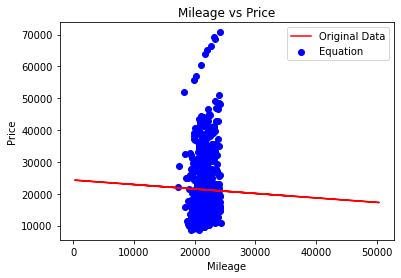

In [49]:
import matplotlib.pyplot as plt
plt.scatter(y_data,df["Price"], color = "blue")
plt.plot(X_data, y_data,color = "red")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.legend(["Original Data","Equation"])
plt.show

In [50]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = df[['Make', 'Model', 'Trim', 'Type']]
X_encoded = enc.fit_transform(X)

In [51]:
import pandas as pd

# One-hot encode the "Make" column
make_one_hot = pd.get_dummies(df['Make'], prefix='Make')
df = pd.concat([df, make_one_hot], axis=1)

# One-hot encode the "Model" column
model_one_hot = pd.get_dummies(df['Model'], prefix='Model')
df = pd.concat([df, model_one_hot], axis=1)

# One-hot encode the "Trim" column
trim_one_hot = pd.get_dummies(df['Trim'], prefix='Trim')
df = pd.concat([df, trim_one_hot], axis=1)

# One-hot encode the "Type" column
type_one_hot = pd.get_dummies(df['Type'], prefix='Type')
df = pd.concat([df, type_one_hot], axis=1)

# Drop the original "Make", "Model", "Trim", and "Type" columns
df.drop(['Make', 'Model', 'Trim', 'Type'], axis=1, inplace=True)

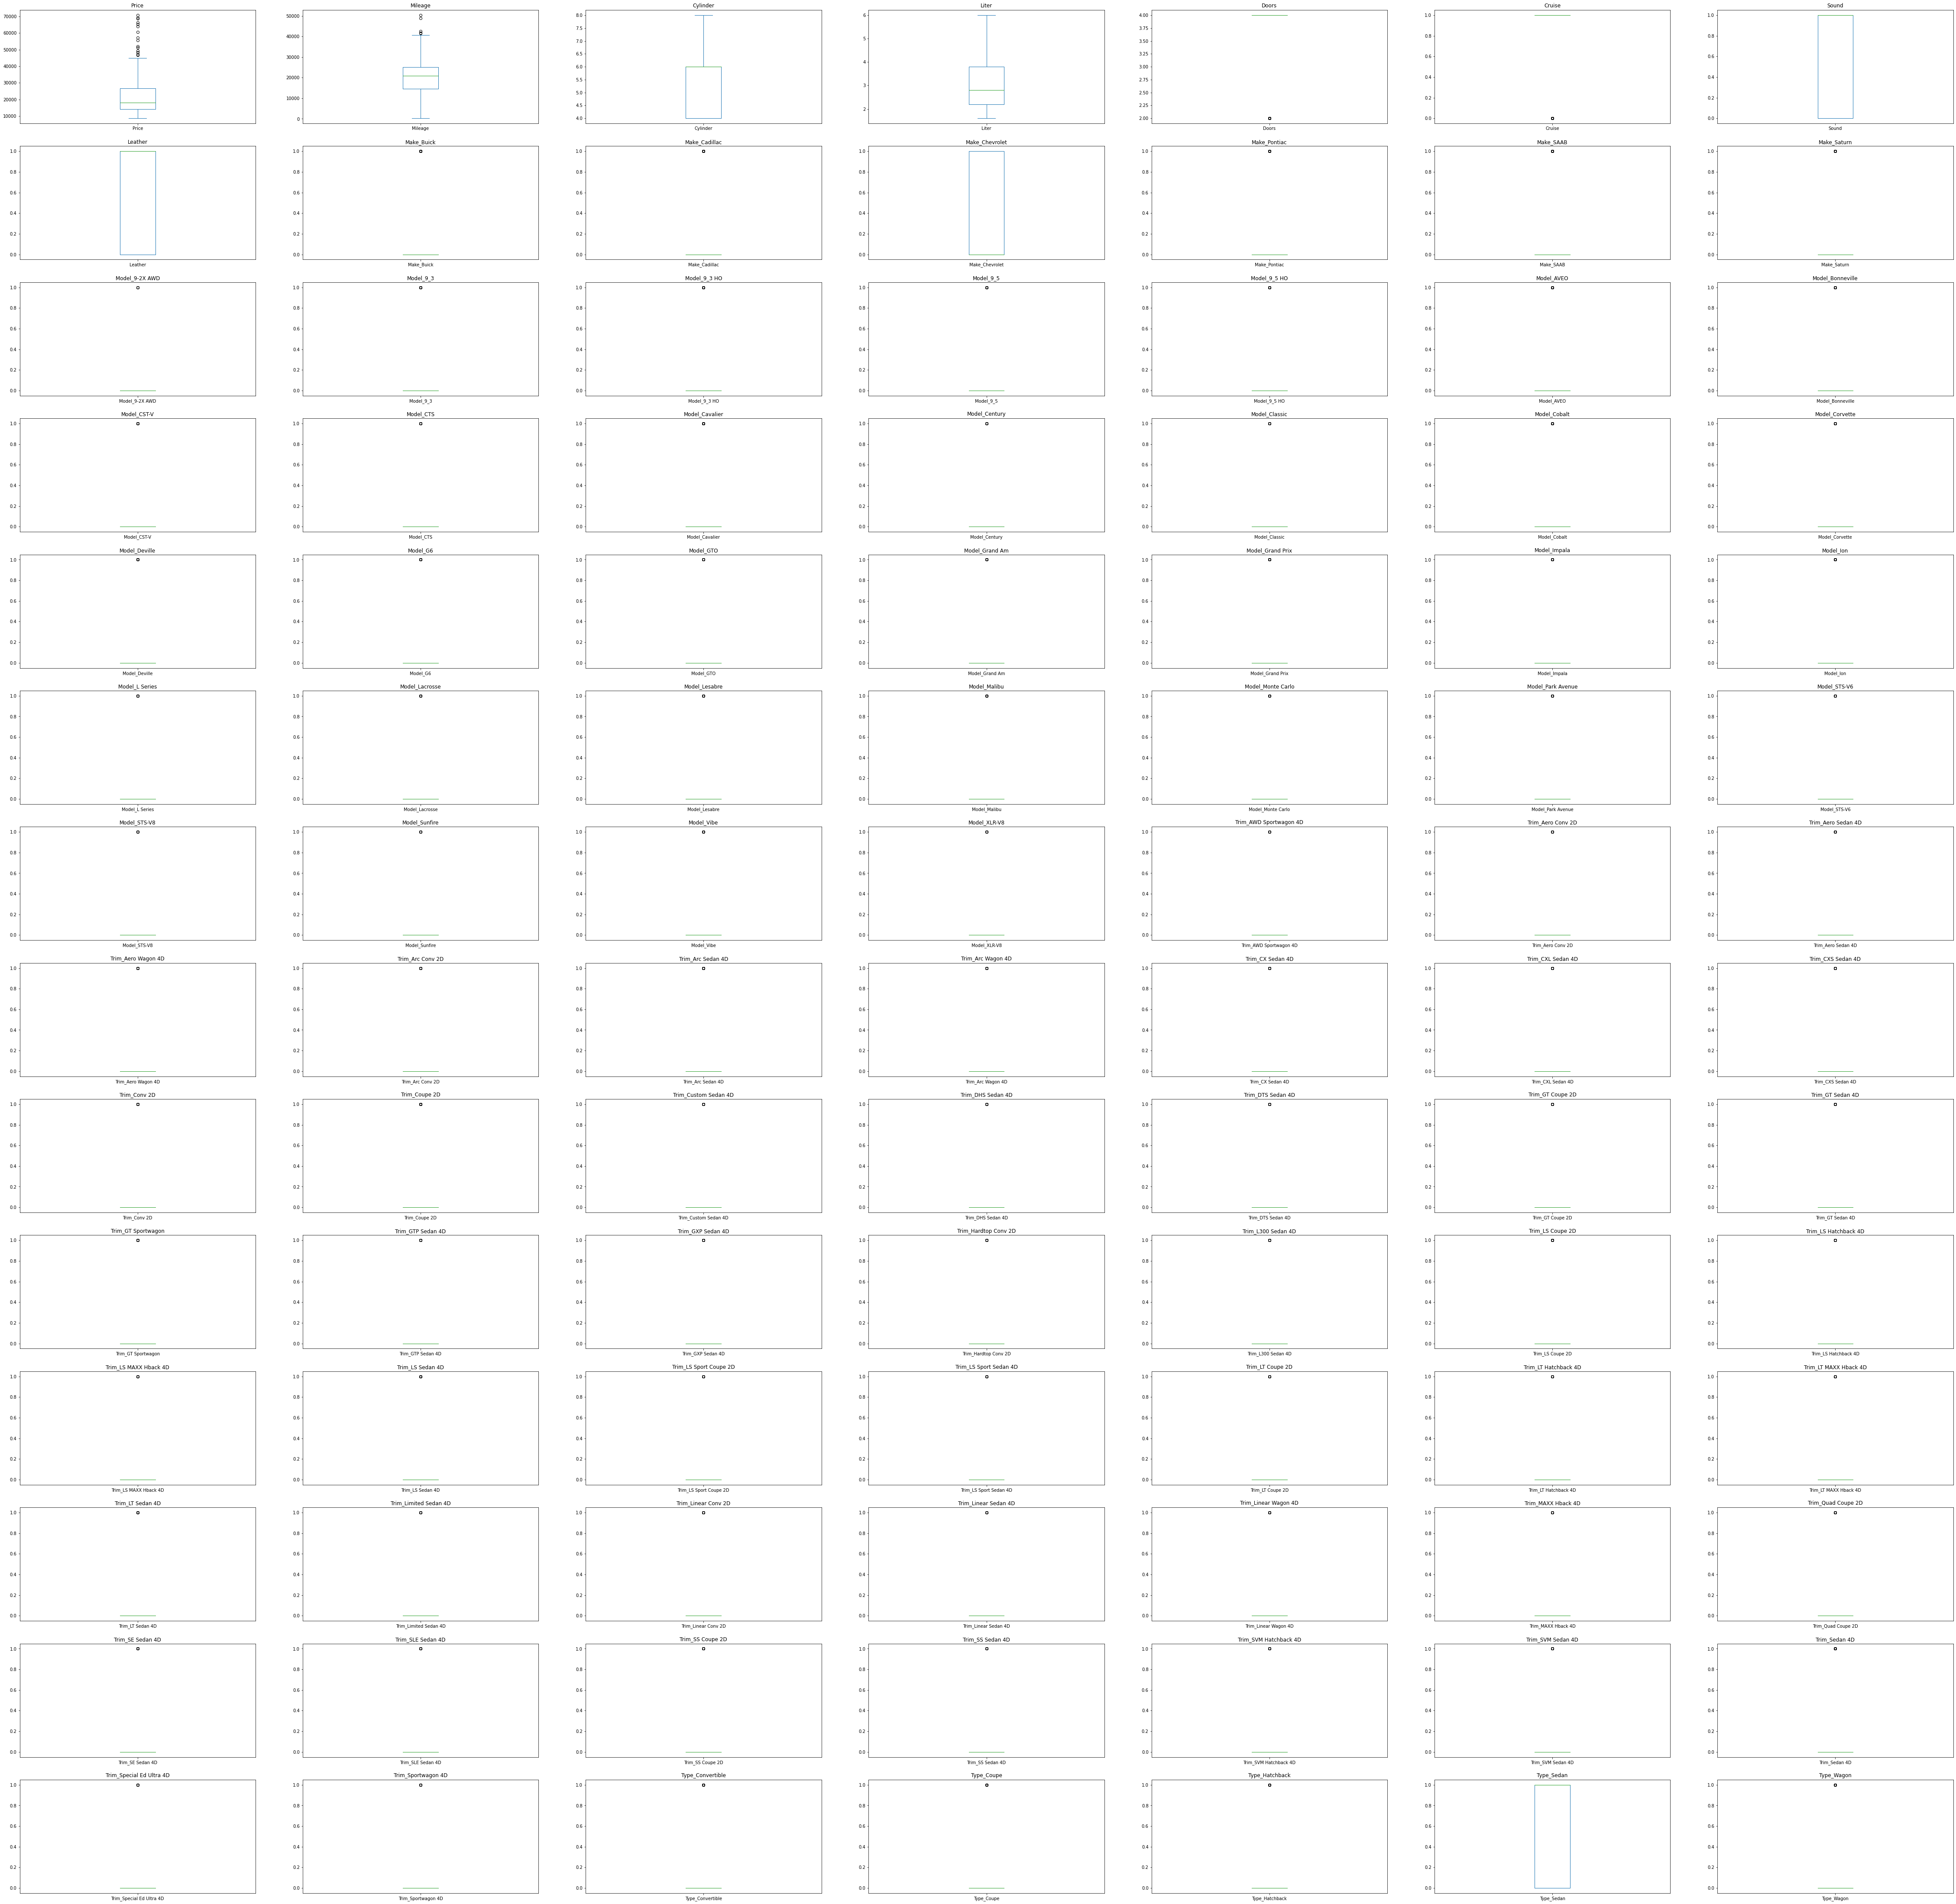

In [52]:
import matplotlib.pyplot as plt

# Create a figure with 98 subplots (one for each column)
fig, axes = plt.subplots(nrows=14, ncols=7, figsize=(80, 80))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Iterate over all columns in the DataFrame
for i, column in enumerate(df.columns):
    # Plot the box plot for the current column
    df[column].plot(kind='box', ax=axes[i])
    # Set the title of the subplot to the column name
    axes[i].set_title(column)

plt.show()


In [53]:
df = df.drop_duplicates()
df.head(2)


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [54]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.017768,0.659297,...,-0.126745,-0.134573,0.038838,0.040549,-0.060414,0.508018,-0.168087,-0.206178,-0.034802,0.045134
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,0.024193,-0.037472,...,-0.062219,0.035201,-0.022737,-0.015758,-0.073391,0.027436,0.001510,-0.025691,-0.015905,0.027016
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.175317,0.534896,...,-0.102674,-0.102674,0.141306,0.059189,-0.102674,0.061533,-0.041657,-0.055019,0.180832,-0.269058
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.188093,0.406216,...,-0.145992,-0.145992,0.120356,0.077468,-0.125677,0.065886,0.046832,-0.125252,0.140098,-0.255308
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.184913,0.087104,...,0.062428,0.062428,0.288053,0.062428,0.062428,-0.462921,-0.825444,0.157973,0.694906,0.163594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_Convertible,0.508018,0.027436,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285,-0.085600,0.086456,...,-0.028899,-0.028899,-0.133346,-0.028899,-0.028899,1.000000,-0.118244,-0.073129,-0.321686,-0.075731
Type_Coupe,-0.168087,0.001510,-0.041657,0.046832,-0.825444,-0.040646,0.097838,0.063507,-0.152636,-0.152636,...,-0.051531,-0.051531,-0.237772,-0.051531,-0.051531,-0.118244,1.000000,-0.130397,-0.573605,-0.135037
Type_Hatchback,-0.206178,-0.025691,-0.055019,-0.125252,0.157973,-0.264846,0.073544,0.090697,-0.094398,-0.094398,...,0.395185,-0.031870,-0.147051,-0.031870,-0.031870,-0.073129,-0.130397,1.000000,-0.354750,-0.083515
Type_Sedan,-0.034802,-0.015905,0.180832,0.140098,0.694906,0.125714,-0.015079,-0.100940,0.266099,0.180930,...,-0.140192,0.089837,0.414521,0.089837,-0.140192,-0.321686,-0.573605,-0.354750,1.000000,-0.367373


In [55]:
X = df.loc[:,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D', 'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Sedan 4D',
       'Trim_Conv 2D', 'Trim_Coupe 2D', 'Trim_Custom Sedan 4D',
       'Trim_DHS Sedan 4D', 'Trim_DTS Sedan 4D', 'Trim_GT Coupe 2D',
       'Trim_GT Sedan 4D', 'Trim_GT Sportwagon', 'Trim_GTP Sedan 4D',
       'Trim_GXP Sedan 4D', 'Trim_Hardtop Conv 2D', 'Trim_L300 Sedan 4D',
       'Trim_LS Coupe 2D', 'Trim_LS Hatchback 4D', 'Trim_LS MAXX Hback 4D',
       'Trim_LS Sedan 4D', 'Trim_LS Sport Coupe 2D', 'Trim_LS Sport Sedan 4D',
       'Trim_LT Coupe 2D', 'Trim_LT Hatchback 4D', 'Trim_LT MAXX Hback 4D',
       'Trim_LT Sedan 4D', 'Trim_Limited Sedan 4D', 'Trim_Linear Conv 2D',
       'Trim_Linear Sedan 4D', 'Trim_Linear Wagon 4D', 'Trim_MAXX Hback 4D',
       'Trim_Quad Coupe 2D', 'Trim_SE Sedan 4D', 'Trim_SLE Sedan 4D', 'Trim_SS Coupe 2D', 'Trim_SS Sedan 4D', 'Trim_SVM Hatchback 4D',
       'Trim_SVM Sedan 4D', 'Trim_Sedan 4D', 'Trim_Special Ed Ultra 4D',
       'Trim_Sportwagon 4D', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values

In [56]:
y = df.loc[:,["Price"]].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
Coef2 = regressor.coef_[0][0]
intercept = regressor.intercept_[0]

equation = f"y = {Coef2:.8f}x + {intercept:.5f}"
print(equation)

y = -0.18469173x + 17081.61852


In [69]:
y_pred = regressor.predict(X_test)

In [74]:
df2 = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}, index=range(len(y_test)))
df2

,Actual,Predicted
0,[14508.7500852241],[14639.624923502444]
1,[16300.4652398485],[16052.263457978797]
2,[13994.906458446],[13629.03063819513]
3,[17839.8007705925],[17598.66349887465]
4,[21831.8229163745],[22053.37241688933]
...,...,...
156,[33005.7799579319],[32331.22454423023]
157,[21300.0194493808],[21760.177033303236]
158,[19338.3759975728],[19053.196476118694]
159,[35895.4994099277],[36754.2409440302]


In [75]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test, y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.9921327726213792


0.9921327726213792

In [82]:
first_row_first_column = (df.iloc[4, 1:98]).tolist()
print((first_row_first_column))


[19832.0, 6.0, 3.1, 4.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


In [83]:
regressor.predict([first_row_first_column]) # perils of extrapolation


array([[15565.19124828]])